In [4]:
# run this cell if groundhog is not installed
import sys
!{sys.executable} -m pip install groundhog

In [1]:
# import required libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from groundhog.shallowfoundations import stressdistribution

In [2]:
# caution! this will suppress all warnings, so use it carefully
import warnings
warnings.filterwarnings('ignore')

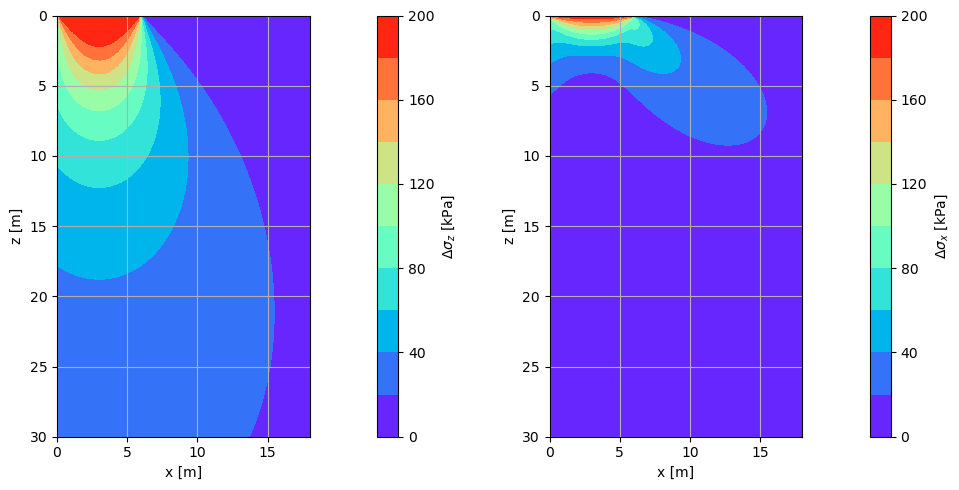

In [3]:
B = 6.0 # width of stripload in m
qs = 200.0 # imposed force per unit area
x = np.linspace(0.0,3.0,60) * B # x = distance from left of strip in m
z = np.linspace(0.0,5.0,100) * B # z = depth in m
X, Z = np.meshgrid(x, z) # grid of x and z locations
DSZ = np.zeros(X.shape) # initialize delta sigma z to zeros
DSX = np.zeros(X.shape) # initialize delta sigma x to zeros

for i in range(X.shape[0]): # for each z
    for j in range(X.shape[1]): # for each x
        dict = stressdistribution.stresses_stripload(Z[i,j],X[i,j],B,qs) # stress
        DSZ[i,j] = dict["delta sigma z [kPa]"] # update delta sigma z
        DSX[i,j] = dict["delta sigma x [kPa]"] # update delta sigma x

fig, ax = plt.subplots(1, 2, figsize=(10,5)) # make a figure with two plots
c_levels = np.linspace(0.0,1.0,11) * qs # contour levels

# on left plot
im = ax[0].contourf(X,Z,DSZ,levels=c_levels,cmap="rainbow") # draw filled contours
plt.colorbar(im, ax=ax[0], label=r"$\Delta\sigma_z$ [kPa]") # draw colorbar
ax[0].axis([0, x[-1], z[-1],0]) # axis limits and invert y axis
ax[0].axis("scaled") # make axes equal
ax[0].grid(True) # add grid
ax[0].set_xlabel("x [m]") # x axis label
ax[0].set_ylabel("z [m]") # y axis label

# on right plot
im = ax[1].contourf(X,Z,DSX,levels=c_levels,cmap="rainbow") # draw filled contours
plt.colorbar(im, ax=ax[1], label=r"$\Delta\sigma_x$ [kPa]") # draw colorbar
ax[1].axis([0, x[-1], z[-1],0]) # axis limits and invert y axis
ax[1].axis("scaled") # make axes equal
ax[1].grid(True) # add grid
ax[1].set_xlabel("x [m]") # x axis label
ax[1].set_ylabel("z [m]") # y axis label

fig.tight_layout(); # fit nicely the plots